In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import math
import Model

if __name__ == "__main__":
	t0 = time.time()
	featureList = ['EPS Growth', 'Volatility 180 D', 'Trailing EPS', 'Price to Cash Flow', 'EPS', 'Volume', 'Return on Assets', 'Price to Book', 'Dividend Yield', 'Total Debt to Total Equity', 'Return on Invested Capital', 'Return on Common Equity']
	train, validate, test = Model.splitData(200,3,12)
	randForest = Model.buildWithIndexesTripleClass(modelType = Model.randomForestClassifier, indexes = train, target= 'Rate of Return', features = featureList, featureLength = 12,\
									targetLength = 3, sector = "Financials", percentileTarget = 90, percentileAvoid = 10, verbose = True)
	print("Labels: ")
	print(randForest.classes_)
	print("Importances: ")
	print(randForest.feature_importances_)

[-129  -90  -24 -168 -120  -84  -99 -174 -192 -144 -153  -75  -96 -195 -138
 -117  -30  -93  -66  -36 -126 -123  -81  -48  -42 -132 -150 -171  -78 -111
  -18  -54 -186  -87 -162 -198 -180]
[ -45  -69  -63 -102  -27 -189 -105  -72 -201  -57 -147  -51]
[ -60 -165  -33 -156 -114 -177  -21 -183 -108 -135 -159 -141  -39]
Index: -129
0.0 percent complete with preparing data.


/Users/masontian/Documents/GitHub/Equity-Analysis/Model.py:168: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  values = data.loc[data.index[len(data) + startIndex:len(data) + endIndex + 1], features]


Index: -90
2.7027027027027026 percent complete with preparing data.
Index: -24
5.405405405405405 percent complete with preparing data.
Index: -168
8.108108108108109 percent complete with preparing data.
Index: -120
10.81081081081081 percent complete with preparing data.
Index: -84
13.513513513513514 percent complete with preparing data.
Index: -99
16.216216216216218 percent complete with preparing data.
Index: -174
18.91891891891892 percent complete with preparing data.
Index: -192
21.62162162162162 percent complete with preparing data.
Index: -144
24.324324324324326 percent complete with preparing data.
Index: -153
27.027027027027028 percent complete with preparing data.
Index: -75
29.72972972972973 percent complete with preparing data.
Index: -96
32.432432432432435 percent complete with preparing data.
Index: -195
35.13513513513514 percent complete with preparing data.
Index: -138
37.83783783783784 percent complete with preparing data.
Index: -117
40.54054054054054 percent complete w

In [2]:
precisions = {'seen':{}, 'above10':{}, 'above75':{}, 'above50':{}, 'above25':{}, 'above90':{}}
betterThan = {}
for prob in range(0,100,5):
	precisions['seen'][prob] = 0
	precisions['above10'][prob] = 0
	precisions['above75'][prob] = 0
	precisions['above50'][prob] = 0
	precisions['above25'][prob] = 0
	precisions['above90'][prob] = 0
for i in validate:
	addedStocks, probabilities = Model.predict_probabilities(randForest, startIndex = i, endIndex = i+11, features = featureList, sector = "Financials")
	actual = []
	for prob in range(0,100,5):
		betterThan[prob] = []
	for stock in addedStocks:
		actual.append(Model.rateOfReturn(Model.retrieveData(stock, 'Last Price', i+12, i+14, [])))
	for i in range(len(probabilities)):
		for prob in range(0,100,5):
			if probabilities[i][1] > prob / 100:
				betterThan[prob].append(1)
			else:
				betterThan[prob].append(0)
	for prob in range(0,100,5):
		if sum(betterThan[prob]) > 0:
			precisions['above10'][prob] = (Model.precision(Model.getPercentile(actual, 10),betterThan[prob]) * len(betterThan[prob]) + precisions['above10'][prob] * precisions['seen'][prob]) / (precisions['seen'][prob] + len(betterThan[prob]))
			precisions['above75'][prob] = (Model.precision(Model.getPercentile(actual, 75),betterThan[prob]) * len(betterThan[prob]) + precisions['above75'][prob] * precisions['seen'][prob]) / (precisions['seen'][prob] + len(betterThan[prob]))
			precisions['above50'][prob] = (Model.precision(Model.getPercentile(actual, 50), betterThan[prob]) * len(betterThan[prob]) + precisions['above50'][prob] * precisions['seen'][prob]) / (precisions['seen'][prob] + len(betterThan[prob]))
			precisions['above25'][prob] = (Model.precision(Model.getPercentile(actual, 25), betterThan[prob]) * len(betterThan[prob]) + precisions['above25'][prob] * precisions['seen'][prob]) / (precisions['seen'][prob] + len(betterThan[prob]))
			precisions['above90'][prob] = (Model.precision(Model.getPercentile(actual, 90), betterThan[prob]) * len(betterThan[prob]) + precisions['above90'][prob] * precisions['seen'][prob]) / (precisions['seen'][prob] + len(betterThan[prob]))
			precisions['seen'][prob] = precisions['seen'][prob] + len(betterThan[prob])
x = []
y90 = []
y75 = []
y50 = []
y25 = []
y10 = []
counts = []
for prob in range(0,100,5):
	print(str(prob) + " above 90th percentile: " + str(precisions['above90'][prob]))
	print(str(prob) + " above 75th percentile: " + str(precisions['above75'][prob]))
	print(str(prob) + " above 50th percentile: " + str(precisions['above50'][prob]))
	print(str(prob) + " above 25th percentile: " + str(precisions['above25'][prob]))
	print(str(prob) + " above 10th percentile: " + str(precisions['above10'][prob]))
	counts.append(sum(betterThan[prob]))
	if (precisions['above10'][prob]) > 0:
		y90.append(precisions['above90'][prob])
		y75.append(precisions['above75'][prob])
		y50.append(precisions['above50'][prob])
		y25.append(precisions['above25'][prob])
		y10.append(precisions['above10'][prob])
		x.append(prob)

print(time.time() - t0, "seconds wait time")

/Users/masontian/Documents/GitHub/Equity-Analysis/Model.py:168: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  values = data.loc[data.index[len(data) + startIndex:len(data) + endIndex + 1], features]


0 above 90th percentile: 0.0997959183673
0 above 75th percentile: 0.247959183673
0 above 50th percentile: 0.494489795918
0 above 25th percentile: 0.741632653061
0 above 10th percentile: 0.889591836735
5 above 90th percentile: 0.110446518646
5 above 75th percentile: 0.263889185524
5 above 50th percentile: 0.504307072501
5 above 25th percentile: 0.747229903598
5 above 10th percentile: 0.889186608946
10 above 90th percentile: 0.127151520629
10 above 75th percentile: 0.286765880706
10 above 50th percentile: 0.519827447971
10 above 25th percentile: 0.746889438765
10 above 10th percentile: 0.87983896109
15 above 90th percentile: 0.154996961868
15 above 75th percentile: 0.317693026208
15 above 50th percentile: 0.539305457656
15 above 25th percentile: 0.750288404424
15 above 10th percentile: 0.873059011711
20 above 90th percentile: 0.175125628249
20 above 75th percentile: 0.34233437266
20 above 50th percentile: 0.543962937727
20 above 25th percentile: 0.753313635432
20 above 10th percentile: 0

Counts: 
[454, 368, 262, 168, 131, 103, 85, 69, 68, 60, 49, 33, 24, 16, 9, 6, 4, 1, 1, 0]


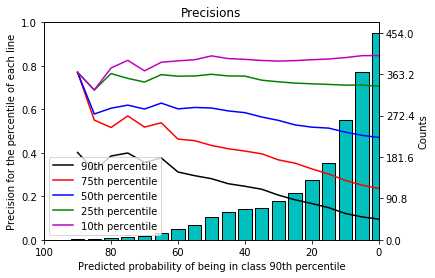

In [3]:
print("Counts: ")
print(counts)
fig = plt.figure()
axes = plt.gca()
axes.set_xlim([0,100])
axes.set_xlim([0,100])
plt.title("Precisions")
plt.xlabel('Predicted probability of being in class 90th percentile')
plt.ylabel('Precision for the percentile of each line')
axes.invert_xaxis()
bar = axes.twinx()
rects = bar.bar(x = list(range(0,100,5)), height = list(map(lambda x: x/max(counts),counts)), width = 4, color = 'c', linestyle = 'solid', edgecolor = 'k', zorder = -1)
bar.set_yticklabels(list(map(lambda x: x * max(counts) / 5, range(0,6,1))))
bar.set_ylabel('Counts', color = 'k')
plt.plot(x, y90, color = 'k', label = "90th percentile")
plt.plot(x, y75, color = 'r', label = "75th percentile")
plt.plot(x, y50, color = 'b', label = "50th percentile")
plt.plot(x, y25, color = 'g', label = "25th percentile")
plt.plot(x, y10, color = 'm', label = "10th percentile")
plt.legend()

In [4]:
fig.savefig(str(time.time()) + 'test.jpg')
plt.show()

Feature ranking:
1. Volatility 180 D (0.099188)
2. EPS Growth (0.092881)
3. Price to Book (0.091664)
4. Price to Cash Flow (0.090048)
5. Volume (0.087258)
6. Return on Common Equity (0.084513)
7. Total Debt to Total Equity (0.083813)
8. Return on Invested Capital (0.083261)
9. EPS (0.074504)
10. Trailing EPS (0.074360)
11. Return on Assets (0.069410)
12. Dividend Yield (0.069099)


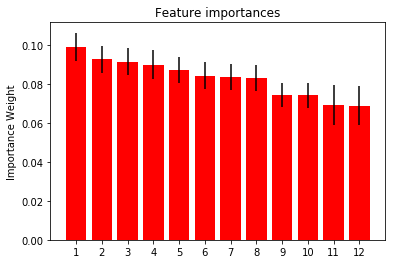

In [17]:
# adapted from http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

importances = randForest.feature_importances_
std = np.std([est.feature_importances_ for est in randForest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(len(featureList)):
    print("%d. %s (%f)" % (f + 1, featureList[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(len(featureList)), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(len(featureList)), range(1,len(featureList)+1))
plt.xlim([-1, len(featureList)])
plt.ylabel('Feature Weight')
plt.show()